In [17]:
import mitsuba as mi
import drjit as dr
from matplotlib import pyplot as plt

mi.set_variant("llvm_ad_spectral_polarized")
mi.variants()

['scalar_rgb',
 'scalar_spectral',
 'scalar_spectral_polarized',
 'llvm_ad_rgb',
 'llvm_ad_mono',
 'llvm_ad_mono_polarized',
 'llvm_ad_spectral',
 'llvm_ad_spectral_polarized',
 'cuda_ad_rgb',
 'cuda_ad_mono',
 'cuda_ad_mono_polarized',
 'cuda_ad_spectral',
 'cuda_ad_spectral_polarized']

In [18]:
scene = mi.load_file("face_normal_scene.xml")
# image = mi.render(scene, spp=128)
image = mi.render(scene, spp=256)
# plt.axis("off")
# plt.imshow(image ** (1.0 / 2.2))
# plt.show()

In [19]:
bitmap = mi.Bitmap(image, channel_names=["R", "G", "B"] + scene.integrator().aov_names())
channels = dict(bitmap.split())

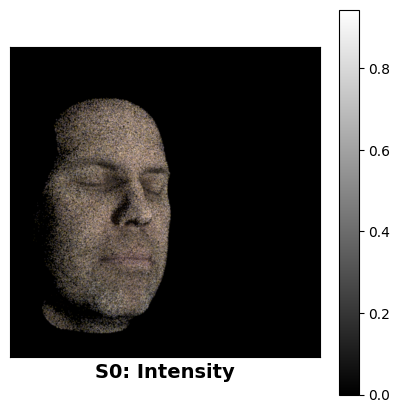

In [20]:
plt.figure(figsize=(5, 5))
plt.imshow(channels["S0"].convert(srgb_gamma=True), cmap="gray")
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel("S0: Intensity", size=14, weight="bold")
plt.show()

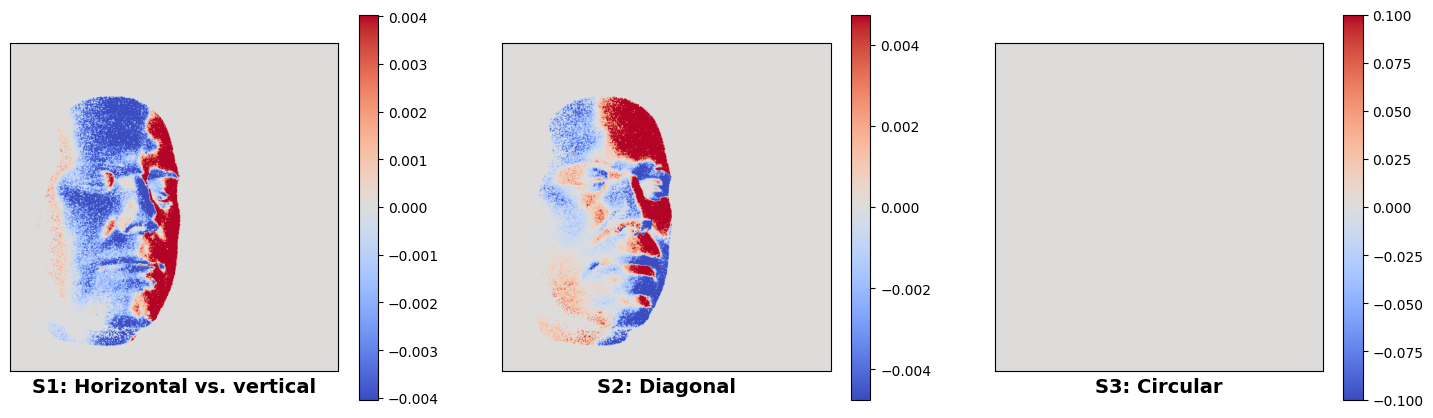

In [21]:
def plot_stokes_component(ax, image):
    # Convert the image into a TensorXf for manipulation
    data = mi.TensorXf(image)[:, :, 0]
    plot_minmax = 0.05 * max(dr.max(data, axis=None), dr.max(-data, axis=None)).array[0] # Arbitrary scale for colormap
    img = ax.imshow(data, cmap='coolwarm', vmin=-plot_minmax, vmax=+plot_minmax)
    ax.set_xticks([]); ax.set_yticks([])
    return img


fig, ax = plt.subplots(ncols=3, figsize=(18, 5))
img = plot_stokes_component(ax[0], channels['S1'])
plt.colorbar(img, ax=ax[0])
img = plot_stokes_component(ax[1], channels['S2'])
plt.colorbar(img, ax=ax[1])
img = plot_stokes_component(ax[2], channels['S3'])
plt.colorbar(img, ax=ax[2])

ax[0].set_xlabel("S1: Horizontal vs. vertical", size=14, weight='bold')
ax[1].set_xlabel("S2: Diagonal", size=14, weight='bold')
ax[2].set_xlabel("S3: Circular", size=14, weight='bold')

plt.show()